https://radiopaedia.org/articles/windowing-ct

In [4]:
import nibabel
import numpy as np
from pathlib import Path

import sys  
sys.path.insert(0, r"D:\Studia\sem7\inzynierka\aplikacja\ImagingCOVID-19\Methods")

import Grayscale as gray
import CTWindowing as window
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ct_scan_folder = Path(r"D:\Studia\sem7\inzynierka\data\segmented_nii_kaggle\ct_scan")

In [32]:
for file in ct_scan_folder.iterdir():
    print(file.name)
    CT = nibabel.load(ct_scan_folder / file)
    CT_array = CT.get_fdata()
    CT_array = CT_array.T
    max_val = np.max(CT_array)
    min_val = np.min(CT_array)
    print("Values: [{0}, {1}]".format(min_val, max_val))
    print("Image shape: {0}".format(CT_array.shape))

coronacases_org_001.nii
Values: [-1021.0, 2996.0]
Image shape: (301, 512, 512)
coronacases_org_002.nii
Values: [-1023.0, 9567.0]
Image shape: (200, 512, 512)
coronacases_org_003.nii
Values: [-1023.0, 8931.0]
Image shape: (200, 512, 512)
coronacases_org_004.nii
Values: [-1021.0, 2020.0]
Image shape: (270, 512, 512)
coronacases_org_005.nii
Values: [-1021.0, 5528.0]
Image shape: (290, 512, 512)
coronacases_org_006.nii
Values: [-1023.0, 2217.0]
Image shape: (213, 512, 512)
coronacases_org_007.nii
Values: [-1023.0, 2515.0]
Image shape: (249, 512, 512)
coronacases_org_008.nii
Values: [-1021.0, 8575.0]
Image shape: (301, 512, 512)
coronacases_org_009.nii
Values: [-1021.0, 1845.0]
Image shape: (256, 512, 512)
coronacases_org_010.nii
Values: [-1021.0, 1920.0]
Image shape: (301, 512, 512)
radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii
Values: [0.0, 255.0]
Image shape: (39, 630, 630)
radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii
Values: [0.0, 255.0]
Image shape: (418, 630, 630)
rad

In [35]:
coronacases = [file for file in ct_scan_folder.iterdir() if file.name.startswith("coronacases")]
radiopaedia = [file for file in ct_scan_folder.iterdir() if file.name.startswith("radiopaedia")]

In [36]:
print(len(coronacases))
print(len(radiopaedia))

10
10


In [20]:
for file in coronacases:
    print(file.name)
    CT = nibabel.load(file)
    CT_array = CT.get_fdata()
    CT_array = CT_array.T
    max_val = np.max(CT_array)
    min_val = np.min(CT_array)
    print("Values: [{0}, {1}]".format(min_val, max_val))

coronacases_org_001.nii
Values: [-1021.0, 2996.0]
coronacases_org_002.nii
Values: [-1023.0, 9567.0]
coronacases_org_003.nii
Values: [-1023.0, 8931.0]
coronacases_org_004.nii
Values: [-1021.0, 2020.0]
coronacases_org_005.nii
Values: [-1021.0, 5528.0]
coronacases_org_006.nii
Values: [-1023.0, 2217.0]
coronacases_org_007.nii
Values: [-1023.0, 2515.0]
coronacases_org_008.nii
Values: [-1021.0, 8575.0]
coronacases_org_009.nii
Values: [-1021.0, 1845.0]
coronacases_org_010.nii
Values: [-1021.0, 1920.0]


In [64]:
def show(file, slice_no):
    print(file.name)
    CT = nibabel.load(file)
    CT_array = CT.get_fdata()
    CT_array = CT_array.T
    max_val = np.max(CT_array)
    min_val = np.min(CT_array)
    print("Values oryginal: [{0}, {1}]".format(min_val, max_val))
    lung_array = window.cut_to_lung_window(CT_array)
    max_val = np.max(lung_array)
    min_val = np.min(lung_array)
    print("Values lung: [{0}, {1}]".format(min_val, max_val))
    gray_array = gray.convert_array_to_grayscale(lung_array)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    ax1.imshow(CT_array[slice_no], cmap='gray')
    ax2.imshow(lung_array[slice_no], cmap='gray')
    ax3.imshow(gray_array[slice_no], cmap='gray')
    ax4.imshow(lung_array[slice_no], cmap='gray', vmin=-2000, vmax=max_val)
    
    
    plt.show()
    

coronacases_org_009.nii
Values oryginal: [-1021.0, 1845.0]
Values lung: [-1021.0, 800.0]


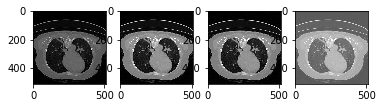

In [65]:
show(coronacases[8], 100)

radiopaedia_org_covid-19-pneumonia-10_85902_1-dcm.nii
Values oryginal: [0.0, 255.0]
Values lung: [0.0, 255.0]


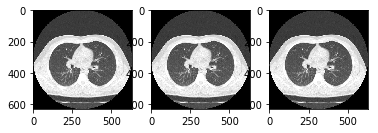

In [39]:
show(radiopaedia[0], 20)

In [42]:
from LungSegmentation.LungSegmentation_MethodA_dicom import SegmentationA

d:\anaconda\envs\inz-env2\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


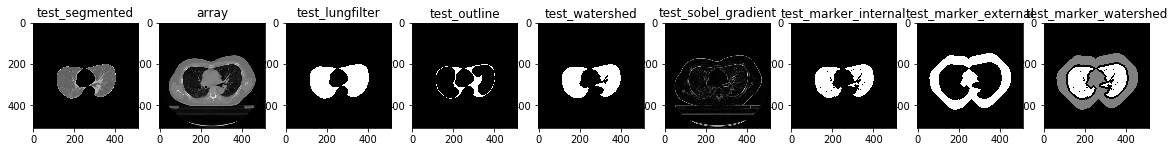

In [109]:
slices = SegmentationA.load_scan(r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm")
arr = SegmentationA.get_pixels_hu(slices)
test_segmented, test_lungfilter, test_outline, test_watershed, test_sobel_gradient, test_marker_internal, \
                test_marker_external, test_marker_watershed = SegmentationA.seperate_lungs(arr[0])

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=[20,20])
ax1.set_title("test_segmented")
ax1.imshow(test_segmented, cmap='gray')

ax2.set_title("array")
ax2.imshow(arr[0], cmap='gray')

ax3.set_title("test_lungfilter")
ax3.imshow(test_lungfilter, cmap='gray')

ax4.set_title("test_outline")
ax4.imshow(test_outline, cmap='gray')

ax5.set_title("test_watershed")
ax5.imshow(test_watershed, cmap='gray')

ax6.set_title("test_sobel_gradient")
ax6.imshow(test_sobel_gradient, cmap='gray')

ax7.set_title("test_marker_internal")
ax7.imshow(test_marker_internal, cmap='gray')

ax8.set_title("test_marker_external")
ax8.imshow(test_marker_external, cmap='gray')

ax9.set_title("test_marker_watershed")
ax9.imshow(test_marker_watershed, cmap='gray')

plt.show()

In [58]:
piece = arr[0]
segmented_trial = np.where(test_lungfilter == 1, piece, -2000*np.ones((len(piece), len(piece[0]))))

In [78]:
print(np.max(segmented_trial))
print(np.min(segmented_trial))

965.0
-2000.0


255
0


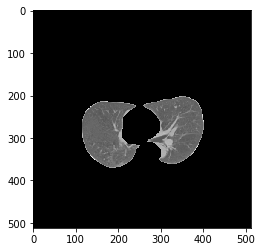

In [82]:
gs = gray.convert_array_to_grayscale(segmented_trial)
print(np.max(gs))
print(np.min(gs))
plt.imshow(gs, cmap='gray')

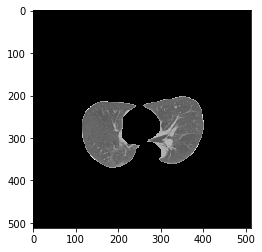

In [79]:
plt.imshow(segmented_trial, cmap='gray', vmin=-2000, vmax=965)

In [68]:
import numpy as np
# import png
import pydicom

path = r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm\1-067.dcm"
ds = pydicom.dcmread(path)

shape = ds.pixel_array.shape

# Convert to float to avoid overflow or underflow losses.
image_2d = ds.pixel_array.astype(float)

# Rescaling grey scale between 0-255
image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0

# Convert to uint
image_2d_scaled = np.uint8(image_2d_scaled)

In [70]:
np.min(image_2d_scaled)

0

In [71]:
np.max(image_2d_scaled)

255

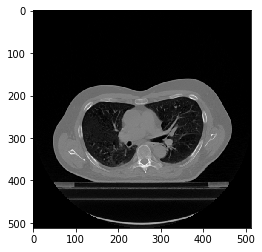

In [103]:
plt.imshow(image_2d_scaled, cmap='gray', vmin=0, vmax=255)

In [84]:
np.min(arr[0]-2000)

-3000

In [85]:
np.max(arr[0]-2000)

-923

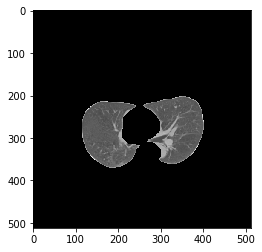

In [92]:
gs = gray.convert_array_to_grayscale(arr[0])
plt.imshow(gs*test_lungfilter, cmap='gray')
sg = np.where(test_lungfilter == 1, gs, -100*np.ones((len(gs), len(gs[0]))))
plt.imshow(sg, cmap='gray')

2
255


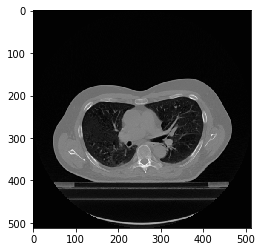

In [143]:
array = arr[0]
# Convert to float to avoid overflow or underflow losses.
array = array.astype(float)

# Rescaling grey scale between 0-255
# array -= array.min()
array += 1024
# array -= array.min()
array *= 255.0 / array.max()
# array *= 255.0 / 3071 

# Convert to uint
array_gray = np.uint8(array)
print(np.min(array_gray))
print(np.max(array_gray))
# return array_gray
plt.imshow(array, cmap='gray', vmin=0, vmax=255)
# plt.imshow(array, cmap='gray')

In [113]:
test = array*test_lungfilter - gray.convert_array_to_grayscale(test_segmented) 

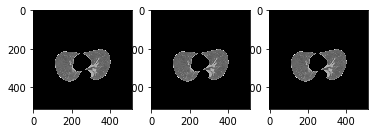

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(test_segmented, cmap='gray')
ax2.imshow(gray.convert_array_to_grayscale(test_segmented), cmap='gray', vmin=0, vmax=255)
ax3.imshow(gray.convert_array_to_grayscale(test_segmented), cmap='gray')

In [116]:
len(test[test == 0])

232146

In [117]:
import matplotlib.image as mpimg

In [118]:
array_jpg = mpimg.imread(r"D:\Studia\sem7\inzynierka\aplikacja\images_data\covid1.jpg")

In [122]:
np.min(array_jpg)

21

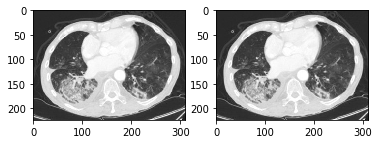

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(array_jpg, cmap='gray')
ax2.imshow(array_jpg, cmap='gray', vmin=0, vmax=255)

In [ ]:
plt.imshow(array_jpg, cmap='gray', vmin=0)

In [152]:
path = r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm\1-067.dcm"
ds = pydicom.dcmread(path)

shape = ds.pixel_array.shape

# Convert to float to avoid overflow or underflow losses.
image_2d = ds.pixel_array.astype(float)

print(np.max(image_2d))
print(np.min(image_2d))

2077.0
0.0


In [153]:
RescaleIntercept = ds.RescaleIntercept
RescaleSlope = ds.RescaleSlope

In [215]:
hu = image_2d * RescaleSlope + RescaleIntercept

In [195]:
print(np.max(hu))
print(np.min(hu))

1077.0
-1000.0


In [217]:
# https://github.com/pydicom/pydicom/issues/352

def array_to_gray(array, black, white):
    arr = array.copy()
    diff = np.abs(white) + np.abs(black)
    arr += np.abs(black) + 1
    arr = np.where(arr<0, 0, arr)
    arr *= 255.0 / (diff+1)
    arr = np.where(arr>255, 255, arr)
    
    return arr

In [246]:
# https://radiopaedia.org/articles/windowing-ct
# lungs W:1500 L:-600
width = 1500
center = -600
low_bound = center - width / 2
upper_bound = center + width / 2

print(low_bound)
print(upper_bound)
print(np.min(hu))
print(np.max(hu))

lung_window = array_to_gray(hu, low_bound, upper_bound)
print(np.min(lung_window))
print(np.max(lung_window))

# Level: −200 HU; Width: 2000
width = 2000
center = -200
low_bound = center - width / 2
upper_bound = center + width / 2
lung_cafe = array_to_gray(hu, low_bound, upper_bound)
print(np.min(lung_cafe))
print(np.max(lung_cafe))


width = 1600
center = -500
low_bound = center - width / 2
upper_bound = center + width / 2
lung = array_to_gray(hu, low_bound, upper_bound)
print(np.min(lung))
print(np.max(lung))


-1350.0
150.0
-1000.0
1077.0
59.63024650233178
255.0
25.614692653673163
255.0
47.9419113054341
255.0


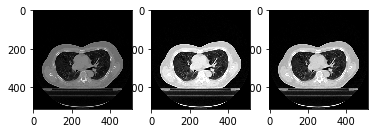

In [247]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(hu, cmap='gray')
ax2.imshow(lung_window, cmap='gray')
ax3.imshow(lung, cmap='gray')
plt.show()

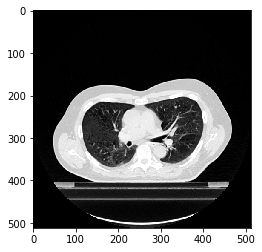

In [220]:
plt.imshow(lung_window, cmap='gray')

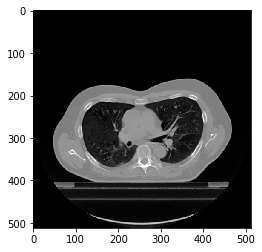

In [224]:
plt.imshow(lung_cafe, cmap='gray')

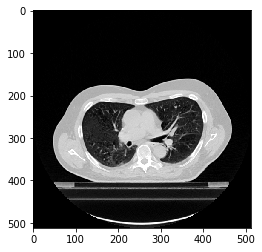

In [248]:
plt.imshow(lung, cmap='gray')

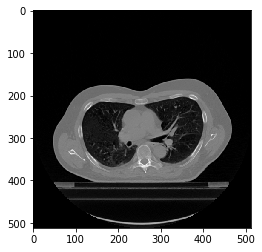

In [221]:
plt.imshow(hu, cmap='gray')

-160.0
240.0
-1000.0
1077.0
0.0
255.0


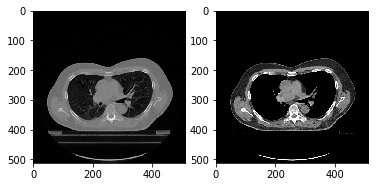

In [216]:
width = 400
center = 40
low_bound = center - width / 2
upper_bound = center + width / 2

print(low_bound)
print(upper_bound)
print(np.min(hu))
print(np.max(hu))

lung_window2 = array_to_gray(hu, low_bound, upper_bound)
print(np.min(lung_window2))
print(np.max(lung_window2))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(hu, cmap='gray')
ax2.imshow(lung_window2, cmap='gray')

plt.show()

In [225]:
CT = nibabel.load(radiopaedia[0])
CT_array = CT.get_fdata()
CT_array = CT_array.T
max_val = np.max(CT_array)
min_val = np.min(CT_array)
print("Values oryginal: [{0}, {1}]".format(min_val, max_val))
lung_array = window.cut_to_lung_window(CT_array)
max_val = np.max(lung_array)
min_val = np.min(lung_array)


Values oryginal: [0.0, 255.0]


In [227]:
CT_array.shape

(39, 630, 630)

In [232]:
ct = CT_array[20]

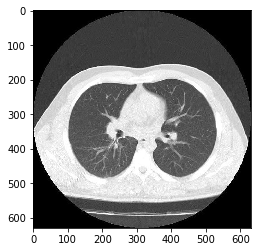

In [233]:
plt.imshow(ct, cmap='gray')

In [245]:
print(np.min(ct))
print(np.max(ct))

0.0
255.0


In [238]:
ct[300:400, 50:200]

array([[210., 213., 213., ..., 108., 126., 146.],
       [206., 210., 211., ..., 115., 121., 128.],
       [208., 212., 212., ..., 107., 114., 124.],
       ...,
       [233., 249., 248., ..., 134., 136., 149.],
       [240., 250., 240., ..., 147., 142., 149.],
       [254., 251., 226., ..., 160., 143., 139.]])

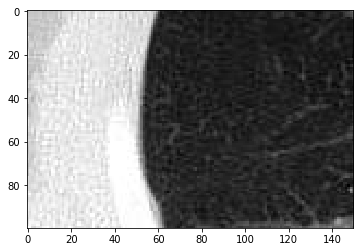

In [237]:
plt.imshow(ct[300:400, 50:200], cmap='gray')

In [242]:
ct[ct>250].shape

(15465,)

In [252]:
range(255)

range(0, 255)

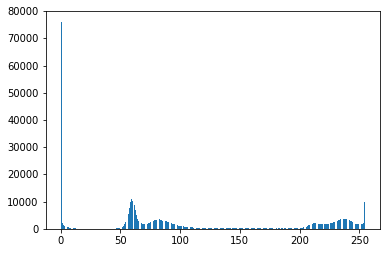

In [257]:
hist, bins = np.histogram(ct, bins=range(256))

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

d:\anaconda\envs\inz-env2\lib\site-packages\scipy\signal\signaltools.py:1475: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
d:\anaconda\envs\inz-env2\lib\site-packages\scipy\signal\signaltools.py:1475: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


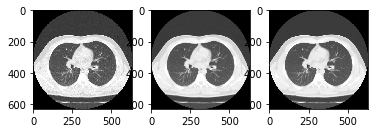

In [264]:
import scipy
from scipy.signal.signaltools import wiener

img_g = scipy.ndimage.gaussian_filter(ct, sigma=5)

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(131)  # left side
ax2 = fig.add_subplot(132)  # right side
ax3 = fig.add_subplot(133) 
# ascent = misc.ascent()
result = scipy.ndimage.gaussian_filter(ct, sigma=1)
filtered_img = wiener(ct, (5, 5))  #Filter the image
ax3.imshow(filtered_img)
ax1.imshow(ct)
ax2.imshow(result)
plt.show()

https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

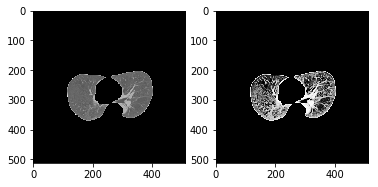

In [269]:
from skimage import exposure

img_eq = exposure.equalize_hist(test_segmented, mask=test_lungfilter)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(test_segmented, cmap='gray')
ax2.imshow(img_eq, cmap='gray')

plt.show()

In [34]:
A = np.array(range(-9, 10, 1))
print(A)
lb = -5
up = 7
max_val = 255
diff = np.abs(up - lb)
A = A - (lb - 1)
# print(A)
A = np.where(A < 0, 0, A)
B = np.where(A > diff, diff, A)
# print(B)
A = A * max_val / diff
B = B * max_val / diff
A = A.astype(int)
B = B.astype(int)
A = np.where(A > max_val, 255, A)
print(A)
print(B)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
[  0   0   0   0  21  42  63  85 106 127 148 170 191 212 233 255 255 255
 255]
[  0   0   0   0  21  42  63  85 106 127 148 170 191 212 233 255 255 255
 255]


In [28]:
def get_lung_window_grayscale(array, width=1500, center=-600):
    # the lower grey level is calculated via WL - (WW ÷ 2)
    black = center - width / 2
    # the upper grey level is calculated via WL + (WW ÷ 2)
    white = center + width / 2
    arr = array.copy().astype(float)
    diff = np.abs(white - black)
    arr -= (black - 1)
    # values below zero are black
    arr = np.where(arr < 0, 0, arr)
    arr *= 255.0 / diff
    # values above 255 are white
    arr = np.where(arr > 255, 255, arr)
    arr = arr.astype(int)
    return arr

In [35]:
get_lung_window_grayscale(np.array(range(-9, 10, 1)), 12, 1)

array([  0,   0,   0,   0,  21,  42,  63,  85, 106, 127, 148, 170, 191,
       212, 233, 255, 255, 255, 255])

In [36]:
-600 + 1500/2

150.0

In [37]:
-600 - 1500/2

-1350.0

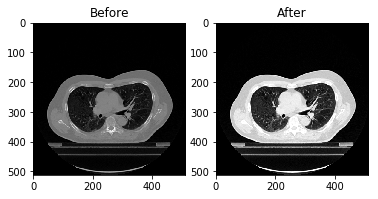

In [5]:
path = r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm\1-067.dcm"
hu = window.check_dicom_lut("1-067.dcm", r"D:\Studia\sem7\inzynierka\aplikacja\images_data\pacjent2_dcm")
lung_window = window.get_ct_window_grayscale(hu)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(hu, cmap='gray')
ax1.set_title("Before")
ax2.imshow(lung_window, cmap='gray')
ax2.set_title("After")
plt.show()

In [6]:
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

import LungSegmentation